For this tutorial, we will use the Wine Quality dataset available from the UCI Machine Learning Repository. This dataset contains physicochemical attributes of wines and their quality ratings.

## Dataset Features:
* Inputs: 11 features, such as alcohol, pH, residual sugar.
* Output: Wine quality (integer values from 0 to 10).
* Goal: Predict the quality of wine.

# Step 1: Import Required Libraries

In [20]:
# Importing necessary libraries for ensemble models and evaluation metrics
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier  # Ensemble models
from sklearn.metrics import accuracy_score, classification_report  # Metrics for model evaluation
import pandas as pd
from sklearn.datasets import load_wine  # To load the Wine Quality dataset
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 2: Load the Wine dataset

In [21]:
wine = load_wine()  # Loading the wine dataset from sklearn's datasets
X = wine.data  # Features of the dataset (all columns except target)
y = wine.target  # Target of the dataset (wine quality ratings)

# Step 3: Split the dataset into training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split divides the dataset, using 80% for training and 20% for testing. random_state is set for reproducibility.

# Step 4: Create ensemble models


# Bagging

In [23]:
# Bagging with Random Forest
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Model Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))

Bagging Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Boosting

In [24]:
# Boosting with AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_adaboost = adaboost_model.predict(X_test)
print("AdaBoost Model Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.82      1.00      0.90        14
           2       1.00      0.88      0.93         8

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



In [25]:
# Boosting with Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gradient = gradient_boosting_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gradient))
print("Classification Report:\n", classification_report(y_test, y_pred_gradient))

Gradient Boosting Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



# Stacking

In [26]:
# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))

Stacking Model Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



# Visualization of Results

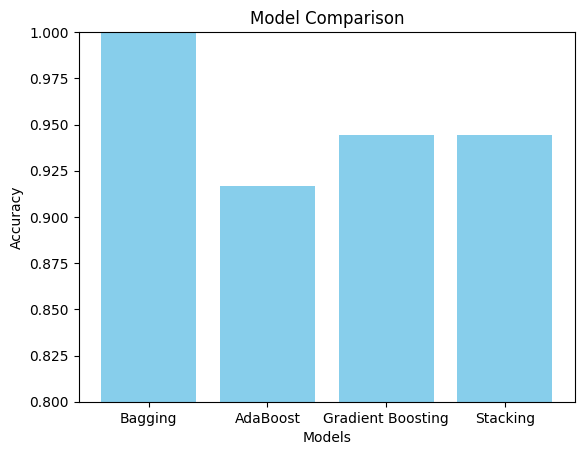

In [27]:
# Importing the matplotlib library for plotting
import matplotlib.pyplot as plt

# Define a list of model names to be displayed on the x-axis
models = ['Bagging', 'AdaBoost', 'Gradient Boosting', 'Stacking']

# Define the accuracy scores for each model by comparing predicted values to actual test values
accuracies = [
    accuracy_score(y_test, y_pred_bagging),  # Accuracy of the Bagging model
    accuracy_score(y_test, y_pred_adaboost),  # Accuracy of the AdaBoost model
    accuracy_score(y_test, y_pred_gradient),  # Accuracy of the Gradient Boosting model
    accuracy_score(y_test, y_pred_stacking)  # Accuracy of the Stacking model
]

# Create a bar plot to visualize the accuracy of each model
plt.bar(models, accuracies, color='skyblue')  # Bar chart with model names on x-axis and accuracy on y-axis

# Set the title of the plot
plt.title('Model Comparison')

# Label the y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# Label the x-axis as 'Models'
plt.xlabel('Models')

# Set the y-axis limits from 0.8 to 1.0 for better visualization of the accuracy range
plt.ylim(0.8, 1.0)

# Display the plot
plt.show()
